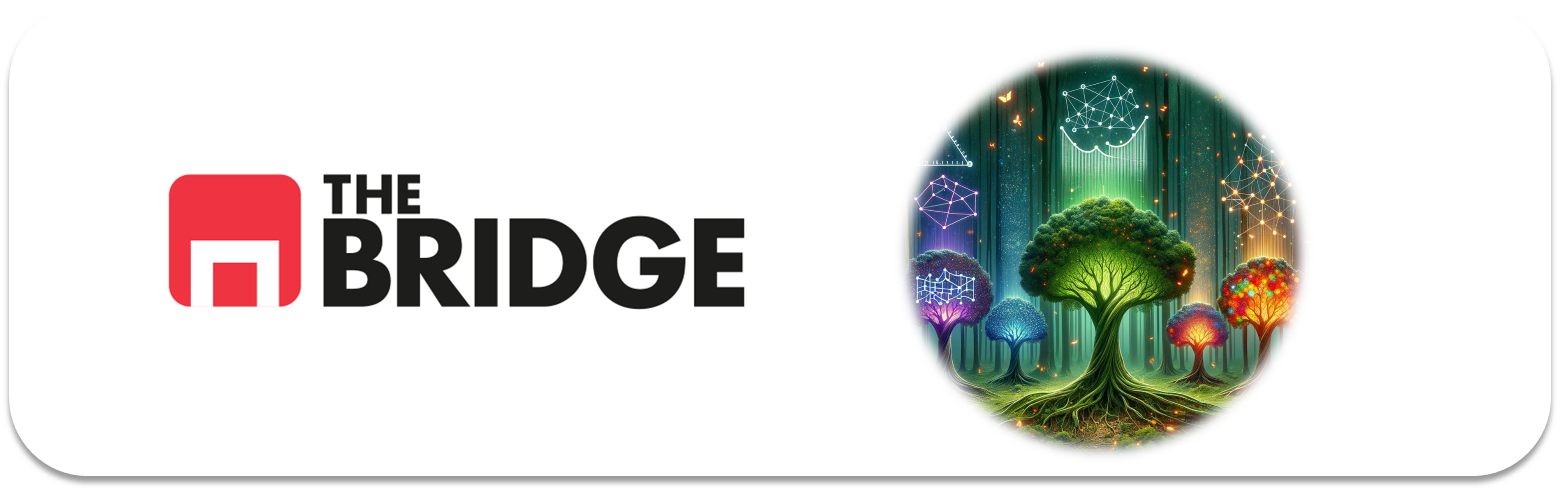

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

PASOS

1. Entender el problema de negocio y trasladarlo a un problema tecnico : supervisado/no, regresion/classificacion
2. Obtener datos
3. Visualizacion, ojeo de los datos
4. Limpieza ( no puedo imputar nulos o valores que tengan que consider agregaciones)
5. Train/Test split
6. Mini-EDA : Sobre el train ya estudio el target, la bivarianza del target con las posibles features --> Lista de potenciales features
7. Tratar las features --> categoricas a numericas, numericas las trasformo y las escalo (si el modelo lo necesita)
8. Seleccion de un conjunto de modelos
9. Los entrenarè con CV(cross validation) --> compararè y me quedo con el mejor
10. Optimizacion de hiperparametros del mejor modelo escogido antes

ALTERNATIVAMENTE
9.bis Optimiza los hiperparametros de todos los modelos a considerar - para entrenar todos los modelos y compare la mejor version de cada modelo - 
10.bis Comparar los optimizados y quedarme con el mejor

In [1]:
#Import
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from bootcampviztools import *

In [2]:
#cargar dataset
df = df = pd.read_csv("./data/bank-full.csv", sep = ";")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Analisis de "unkown"
for col in df.columns:
    print(f"Para {col}, unknowns o missings:", end = " ")
    try:
        missings = df[col].value_counts()["unknown"]
        print(f"{missings}, {round(missings/len(df)*100.0,2)}%")
    except:
        print(0)

Para age, unknowns o missings: 0
Para job, unknowns o missings: 288, 0.64%
Para marital, unknowns o missings: 0
Para education, unknowns o missings: 1857, 4.11%
Para default, unknowns o missings: 0
Para balance, unknowns o missings: 0
Para housing, unknowns o missings: 0
Para loan, unknowns o missings: 0
Para contact, unknowns o missings: 13020, 28.8%
Para day, unknowns o missings: 0
Para month, unknowns o missings: 0
Para duration, unknowns o missings: 0
Para campaign, unknowns o missings: 0
Para pdays, unknowns o missings: 0
Para previous, unknowns o missings: 0
Para poutcome, unknowns o missings: 36959, 81.75%
Para y, unknowns o missings: 0


El dataset no presenta nulos, aunque tenga valores Unknown

In [6]:
df['DEP'] = df['y'].replace({
    'no': 0,
    'yes': 1,
})

C:\Users\PC\AppData\Local\Temp\ipykernel_2040\108487491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DEP'] = df['y'].replace({


In [12]:
df.DEP.value_counts()

DEP
0    39922
1     5289
Name: count, dtype: int64

In [8]:
#Split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42) 

In [9]:
target = 'DEP'

1. Problema supervisado y de clasificacion

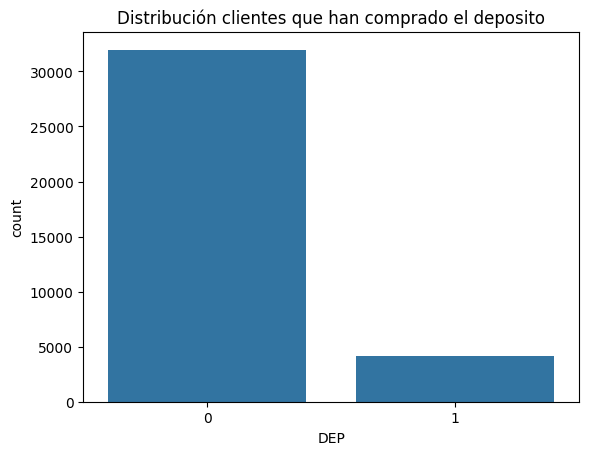

In [13]:
# FREQUENCIA DE LA VARIABLE TARGET
sns.countplot(x=target, data=train_set)
plt.title("Distribución clientes que han comprado el deposito")
plt.show()

Mini-EDA

In [12]:
## Bivariante  -> target con todas las demas
## Colinealidad de features -> Le sienta mal para generalizar -> Heatmap de las variables numéricas 

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,DEP
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [15]:
corr = train_set.corr(numeric_only = True)
corr

,age,balance,day,duration,campaign,pdays,previous,DEP
age,1.000000,0.098921,-0.007882,-0.007414,0.003160,-0.023231,0.002397,0.026684
balance,0.098921,1.000000,0.000455,0.025590,-0.018566,0.002122,0.015291,0.052518
day,-0.007882,0.000455,1.000000,-0.025719,0.160599,-0.094405,-0.053229,-0.025887
duration,-0.007414,0.025590,-0.025719,1.000000,-0.086526,-0.001179,0.002557,0.393402
campaign,0.003160,-0.018566,0.160599,-0.086526,1.000000,-0.089317,-0.033300,-0.072571
pdays,-0.023231,0.002122,-0.094405,-0.001179,-0.089317,1.000000,0.440662,0.105742
previous,0.002397,0.015291,-0.053229,0.002557,-0.033300,0.440662,1.000000,0.092051
DEP,0.026684,0.052518,-0.025887,0.393402,-0.072571,0.105742,0.092051,1.000000


In [16]:
corr[target].sort_values(ascending = False)

DEP         1.000000
duration    0.393402
pdays       0.105742
previous    0.092051
balance     0.052518
age         0.026684
day        -0.025887
campaign   -0.072571
Name: DEP, dtype: float64

<Axes: >

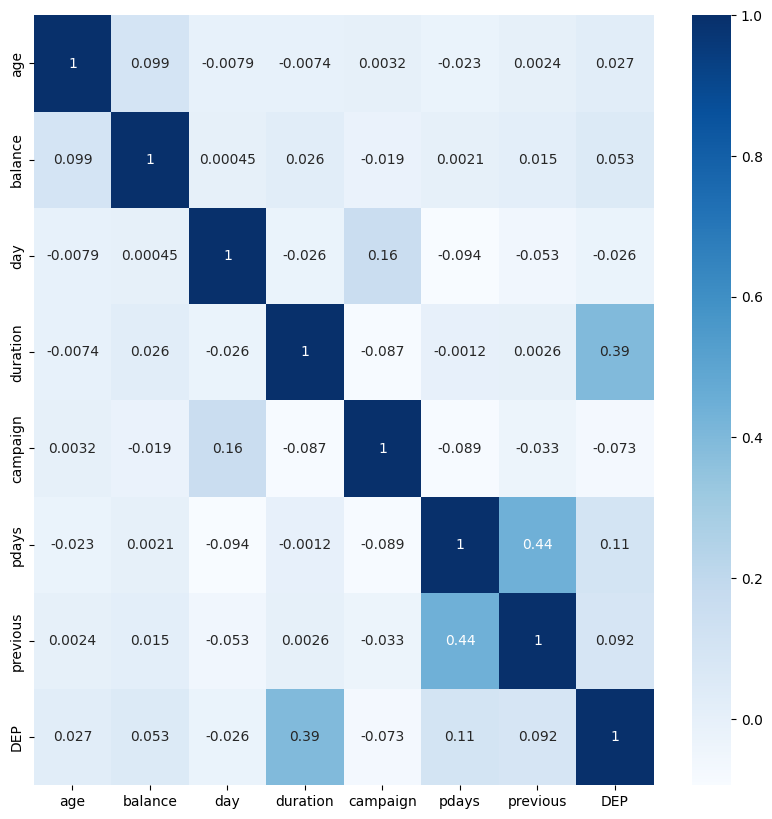

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "Blues")

In [18]:
train_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'DEP'],
      dtype='object')

In [20]:
features_num = ['age', 'duration', 'campaign', 'pdays',
       'previous']
       # no considero day

In [21]:
#Colinealidad
criterio_col = 0.7
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            # print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    # print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                #else:
                    #print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            # else:
            #     print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con age
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con duration
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con campaign
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con pdays
soy yo misma, no me excluyo
Voy a comprobar la colinealidad con previous
soy yo misma, no me excluyo


In [22]:
excluidas

[]

In [23]:
features_cat = ['job', 'marital', 'education', 'default', 'housing',
                'loan', 'contact', 'month','poutcome']

Tabla contingencia de variable target con job
 DEP               0     1
job                      
admin.         3641   496
blue-collar    7242   564
entrepreneur   1076   102
housemaid       908    94
management     6484  1016
retired        1411   404
self-employed  1128   158
services       3046   304
student         535   207
technician     5433   663
unemployed      859   164
unknown         207    26


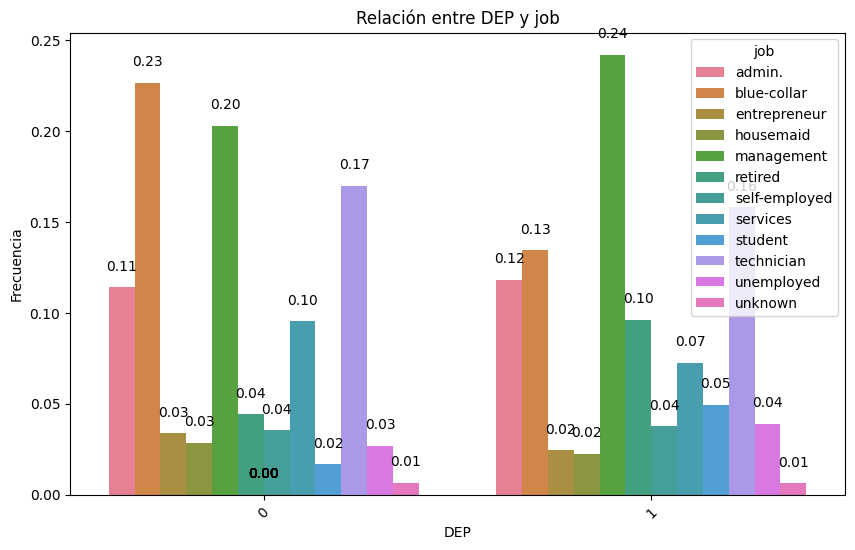

Tabla contingencia de variable target con marital
 DEP           0     1
marital              
divorced   3647   496
married   19611  2193
single     8712  1509


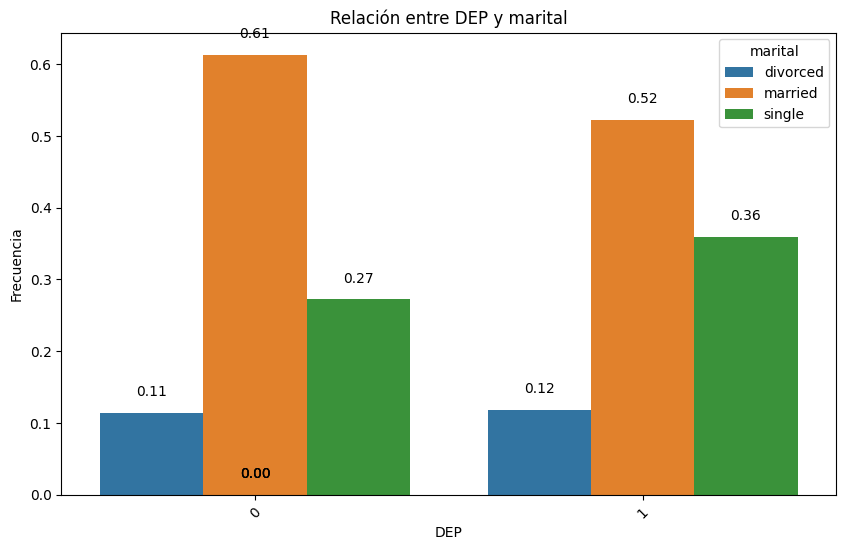

Tabla contingencia de variable target con education
 DEP            0     1
education             
primary     5003   473
secondary  16704  1966
tertiary    8969  1570
unknown     1294   189


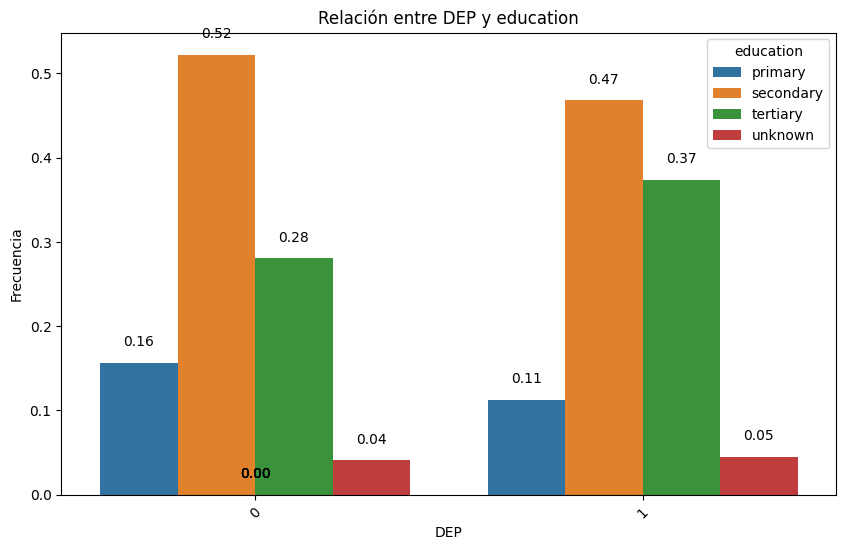

Tabla contingencia de variable target con default
 DEP          0     1
default             
no       31334  4157
yes        636    41


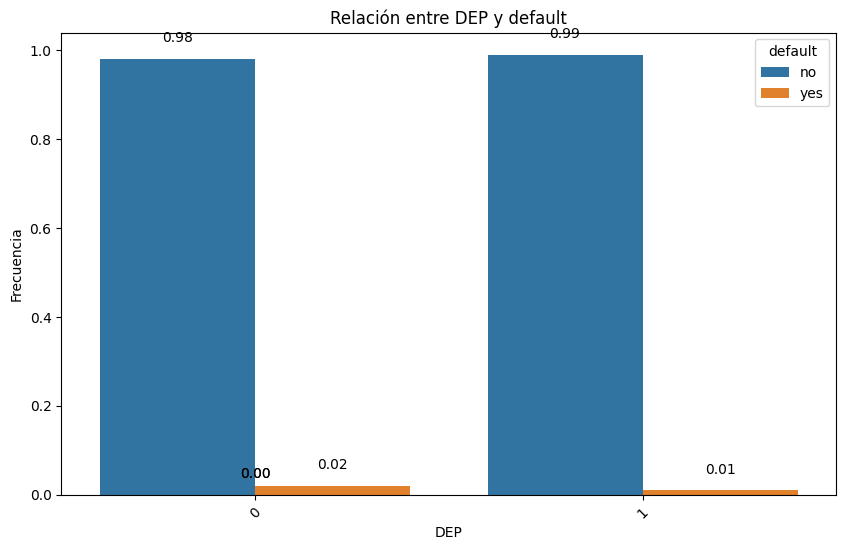

Tabla contingencia de variable target con housing
 DEP          0     1
housing             
no       13365  2668
yes      18605  1530


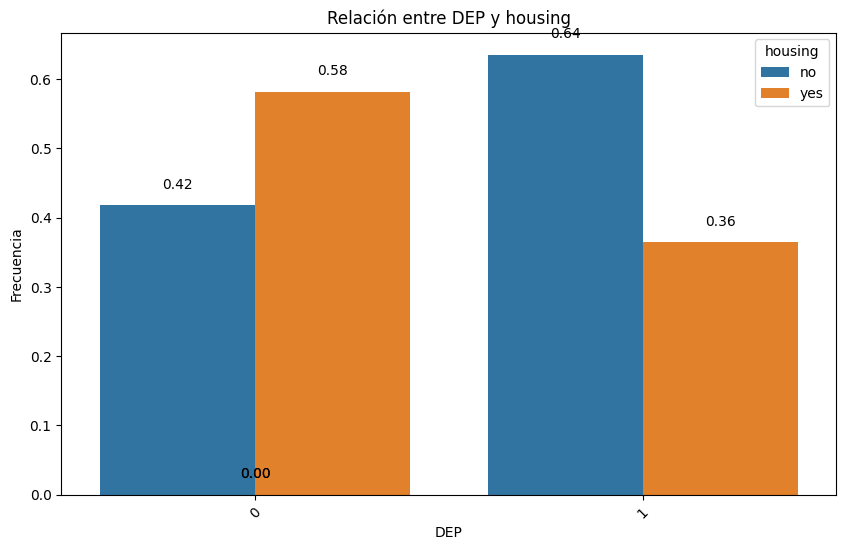

Tabla contingencia de variable target con loan
 DEP       0     1
loan             
no    26528  3805
yes    5442   393


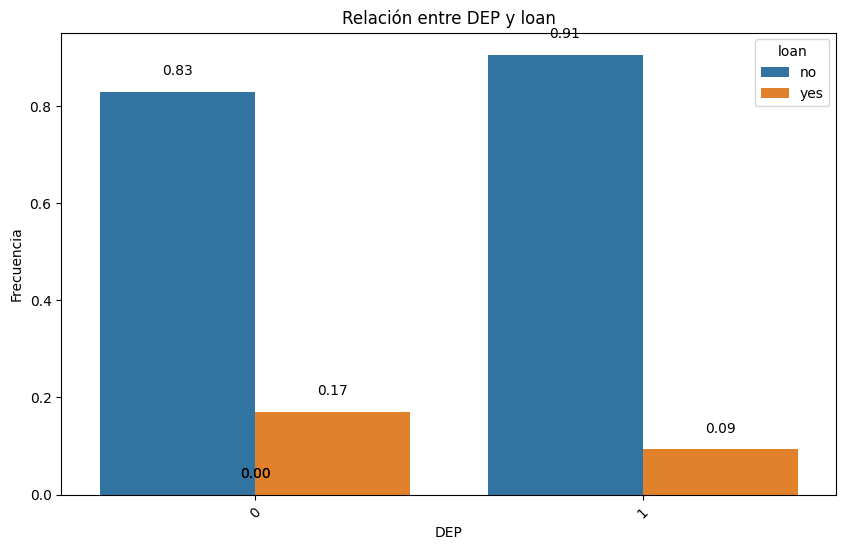

Tabla contingencia de variable target con contact
 DEP            0     1
contact               
cellular   19985  3479
telephone   2001   318
unknown     9984   401


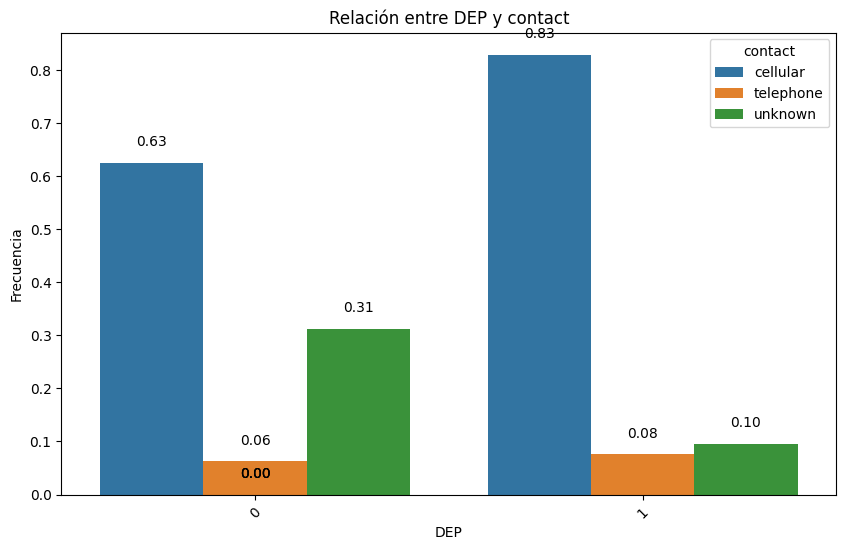

Tabla contingencia de variable target con month
 DEP        0    1
month            
apr     1869  475
aug     4415  551
dec       98   85
feb     1781  331
jan     1023  112
jul     5028  509
jun     3891  427
mar      181  193
may    10248  715
nov     2851  322
oct      337  262
sep      248  216


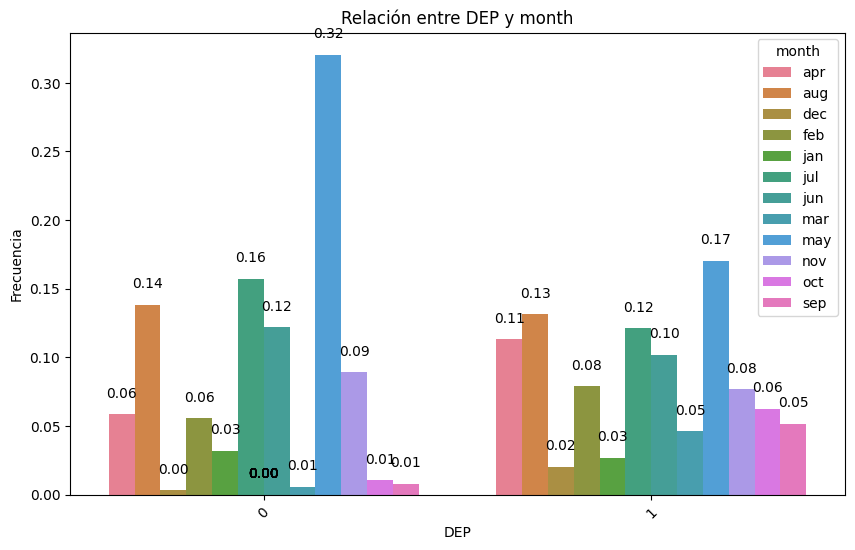

Tabla contingencia de variable target con poutcome
 DEP           0     1
poutcome             
failure    3406   495
other      1242   255
success     434   776
unknown   26888  2672


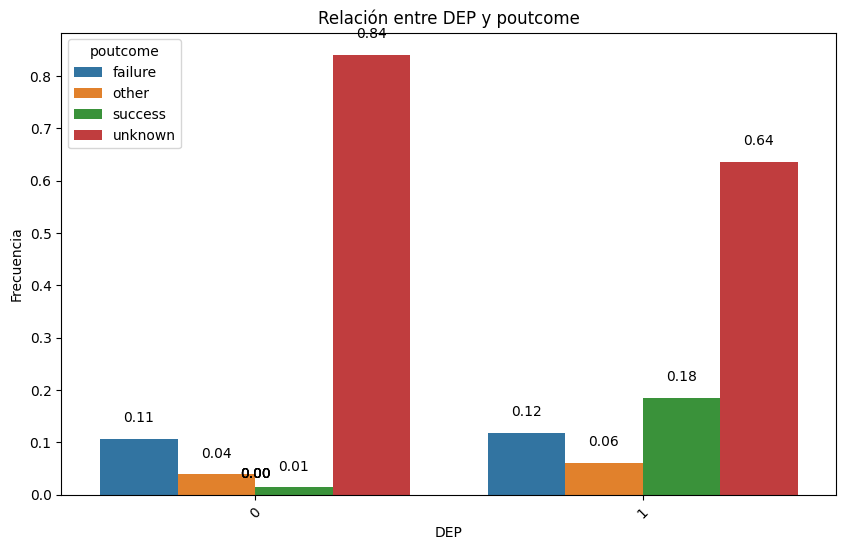

In [24]:
for cat in features_cat:
    tabla_contingencia = pd.crosstab(train_set[cat], train_set[target])
    print(f'Tabla contingencia de variable target con {cat}\n {tabla_contingencia}')
    plot_categorical_relationship_fin(train_set, target,cat, relative_freq=True, show_values= True, size_group=15)

Transformacion variables cat en numericas
Intento utilizar la Codificación Frecuencial (Frequency Encoding)
Reemplaza cada categoría por la frecuencia relativa o absoluta de su aparición en el conjunto de datos.

Cuándo usarlo: Para modelos que pueden beneficiarse de esta información (e.g., Árboles de decisión).
Ventaja: No aumenta la dimensionalidad.
Desventaja: Puede introducir sesgo si las frecuencias están correlacionadas con la variable objetivo.

In [25]:
for var_cat in features_cat:
    #print(train_set[var_cat].value_counts(normalize=True))
    freq_encoding = train_set[var_cat].value_counts(normalize=True)
    train_set[var_cat] = train_set[var_cat].map(freq_encoding)

train_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,DEP
3344,41,0.215826,0.602853,0.151405,0.981282,849,0.556708,0.83867,0.287132,15,0.303113,72,1,-1,0,0.817297,no,0
17965,49,0.168547,0.602853,0.151405,0.981282,1415,0.556708,0.83867,0.648750,30,0.153091,269,2,-1,0,0.817297,no,0
18299,42,0.114383,0.602853,0.516202,0.981282,3842,0.443292,0.83867,0.648750,31,0.153091,130,4,-1,0,0.817297,no,0
10221,37,0.207366,0.282598,0.291390,0.981282,-119,0.556708,0.83867,0.287132,11,0.119387,375,11,-1,0,0.817297,no,0
32192,56,0.215826,0.602853,0.151405,0.981282,3498,0.443292,0.83867,0.648750,15,0.064809,264,2,-1,0,0.817297,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,0.027704,0.282598,0.151405,0.981282,1059,0.443292,0.83867,0.287132,18,0.119387,2093,1,-1,0,0.817297,yes,1
44732,23,0.020515,0.282598,0.291390,0.981282,508,0.443292,0.83867,0.648750,8,0.012829,210,1,92,1,0.107858,no,0
38158,34,0.168547,0.114549,0.291390,0.981282,1317,0.556708,0.83867,0.648750,15,0.303113,239,1,-1,0,0.817297,no,0
860,33,0.050182,0.602853,0.516202,0.981282,165,0.443292,0.83867,0.287132,7,0.303113,111,1,-1,0,0.817297,no,0


In [26]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        36168 non-null  int64  
 1   job        36168 non-null  float64
 2   marital    36168 non-null  float64
 3   education  36168 non-null  float64
 4   default    36168 non-null  float64
 5   balance    36168 non-null  int64  
 6   housing    36168 non-null  float64
 7   loan       36168 non-null  float64
 8   contact    36168 non-null  float64
 9   day        36168 non-null  int64  
 10  month      36168 non-null  float64
 11  duration   36168 non-null  int64  
 12  campaign   36168 non-null  int64  
 13  pdays      36168 non-null  int64  
 14  previous   36168 non-null  int64  
 15  poutcome   36168 non-null  float64
 16  y          36168 non-null  object 
 17  DEP        36168 non-null  int64  
dtypes: float64(9), int64(8), object(1)
memory usage: 5.2+ MB


Posibles features

In [27]:
features_num
features_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

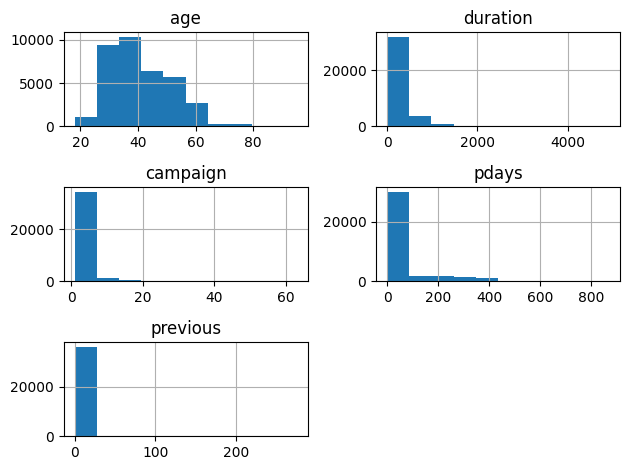

In [28]:
train_set[features_num].hist()
plt.tight_layout()

In [29]:
features_all = features_num + features_cat

In [30]:
X_train = train_set[features_all]
y_train = train_set[target]



In [31]:
#utilizo el frequence encoding
for var_cat in features_cat:
    #print(train_set[var_cat].value_counts(normalize=True))
    freq_encoding = test_set[var_cat].value_counts(normalize=True)
    test_set[var_cat] = test_set[var_cat].map(freq_encoding)

test_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,DEP
3776,40,0.212982,0.598253,0.501161,0.98474,580,0.552361,0.844189,0.291386,16,0.309964,192,1,-1,0,0.818202,no,0
9928,47,0.088909,0.284087,0.501161,0.98474,3644,0.447639,0.844189,0.291386,9,0.113126,83,2,-1,0,0.818202,no,0
33409,25,0.021674,0.284087,0.305430,0.98474,538,0.552361,0.844189,0.643702,20,0.065023,226,1,-1,0,0.818202,no,0
31885,42,0.216521,0.598253,0.305430,0.98474,1773,0.447639,0.844189,0.643702,9,0.065023,311,1,336,1,0.110583,no,0
15738,56,0.216521,0.598253,0.305430,0.98474,217,0.447639,0.155811,0.643702,21,0.150171,121,2,-1,0,0.818202,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47,0.216521,0.598253,0.305430,0.98474,1890,0.447639,0.844189,0.643702,8,0.150171,161,1,-1,0,0.818202,no,0
38732,32,0.212982,0.284087,0.501161,0.98474,217,0.552361,0.844189,0.643702,15,0.309964,692,3,-1,0,0.818202,yes,1
5654,52,0.114343,0.117660,0.501161,0.98474,0,0.552361,0.844189,0.291386,26,0.309964,206,1,-1,0,0.818202,no,0
3779,40,0.114343,0.117660,0.501161,0.98474,783,0.552361,0.155811,0.291386,16,0.309964,171,2,-1,0,0.818202,no,0


In [32]:
X_test = test_set[features_all]
y_test = test_set[target]

PARA EL MODELO DECISION TREE NO HACE FALTA ESCALAR Y NORMALIZAR LOS DATOS

In [31]:
# train_set["age"] = train_set["age"].apply(np.log)
# train_set["age"].hist()
# plt.tight_layout();

# features_transform = ["age","duration","campaign","pdays"]
# for feature in features_transform:
#     train_set[feature] = train_set[feature].apply(np.log)

# train_set[features_transform].hist()
# plt.tight_layout();

In [33]:
from sklearn.tree import DecisionTreeClassifier
#istanciamos el metodo clasificador
tree_clf = DecisionTreeClassifier(max_depth=10,random_state=42)
#max_depth es un hiperparametro de los arboles de clasificacion
#max_depth indica la max profundidad del arbol en niveles


tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

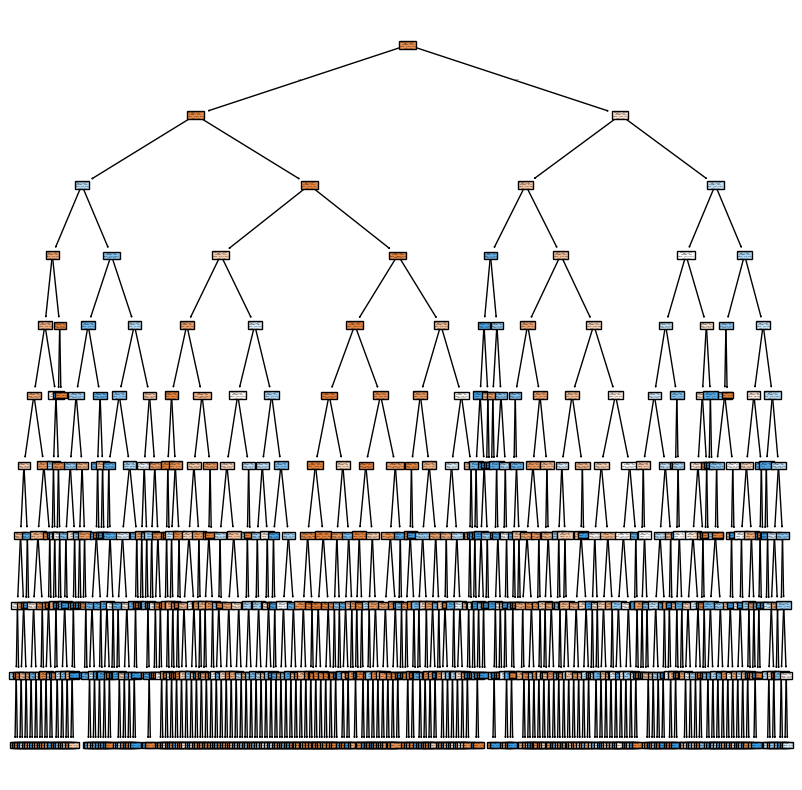

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=features_all,
               class_names=True,
               filled = True); # Prueba a poner el argumento 'filled' a False

In [ ]:
#PARA CLASIFICADORES HUBIERA TENIDO QUE UTILIZAR OTRAS METRICAS... ACCURACY-RECALL-F1-SCORE, LA MATRIX DE CONFUSION.....

# from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# y_pred = tree_clf.predict(X_test)

# print("MAE:", median_absolute_error(y_test, y_pred))
# print("RMSE:", root_mean_squared_error(y_test, y_pred))


In [37]:
y_pred = tree_clf.predict(X_test)

print(classification_report(y_test, tree_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.38      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.model_selection import GridSearchCV

#con el grid Search se probaràn todas las combinaciones que el damos
#es decri, en este caso, 800
param_grid = {
    'max_depth': [2,4,6,8,10,20],
    'min_samples_split': [100, 200, 500, 1000] , 
     'min_samples_leaf' : [50, 100, 200, 300,],
     'class_weight': ['balanced', None]
}

ArbolClf = DecisionTreeClassifier()

grid_search = GridSearchCV(ArbolClf,
                           param_grid,
                           cv=5,
                           n_jobs=-1 #paraleliza para utilizar toda la capacidad de mi ordenador!
                          )

grid_search.fit(X_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [2, 4, 6, 8, 10, 20],
                         'min_samples_leaf': [50, 100, 200, 300],
                         'min_samples_split': [100, 200, 500, 1000]})

In [41]:
grid_search.best_params_

{'class_weight': None,
 'max_depth': 6,
 'min_samples_leaf': 100,
 'min_samples_split': 100}

In [42]:
grid_search.best_score_

np.float64(0.9026488239839818)

In [43]:
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=100,random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=100,
                       random_state=42)

In [45]:
y_pred_opt = tree_clf.predict(X_test)

print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7952
           1       0.62      0.44      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043

